In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/mlproject/breast_cancer_data.zip'  # ← update if your path is different
extract_dir = '/content/breast_cancer_data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("✅ Extracted to:", extract_dir)

✅ Extracted to: /content/breast_cancer_data


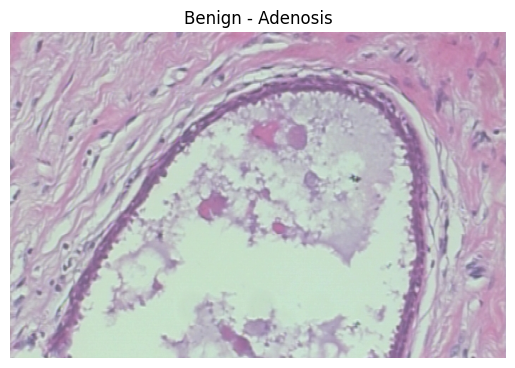

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Correct path to an image file
img_path = '/content/breast_cancer_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png'

# Open and display the image
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title("Benign - Adenosis")
plt.show()

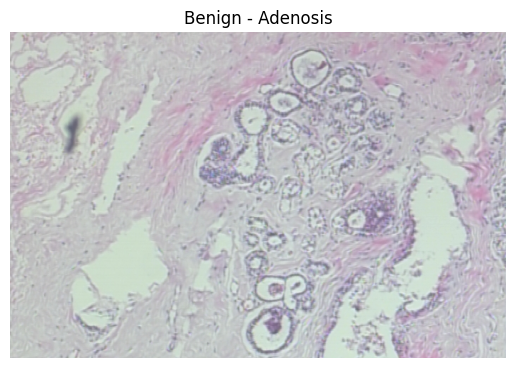

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Correct path to an image file
img_path = '/content/breast_cancer_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/40X/SOB_B_A-14-22549AB-40-001.png'

# Open and display the image
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title("Benign - Adenosis")
plt.show()

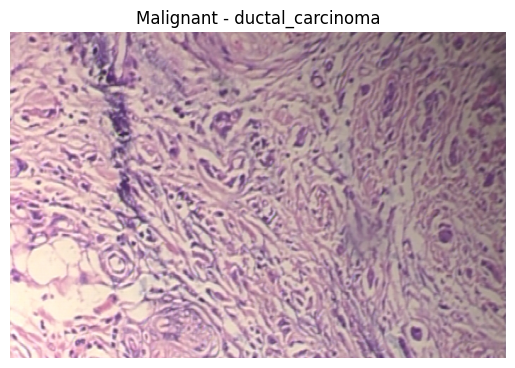

In [ ]:
img_path = '/content/breast_cancer_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-10926/100X/SOB_M_DC-14-10926-100-001.png'

# Open and display the image
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title("Malignant - ductal_carcinoma")
plt.show()

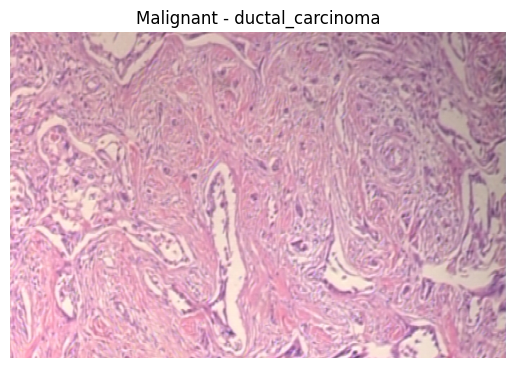

In [ ]:
img_path = '/content/breast_cancer_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-10926/40X/SOB_M_DC-14-10926-40-001.png'

# Open and display the image
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title("Malignant - ductal_carcinoma")
plt.show()

In [ ]:
import numpy as np
from PIL import Image
import os
from tqdm import tqdm

In [ ]:
#setting up the parameters
BASE_DIR = '/content/breast_cancer_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast'
IMAGE_SIZE = (128, 128)  # Resize images
data = []
labels = []

In [ ]:
for label_type in ['benign', 'malignant']:
    label_value = 0 if label_type == 'benign' else 1
    sob_path = os.path.join(BASE_DIR, label_type, 'SOB')

    for subtype in os.listdir(sob_path):
        subtype_path = os.path.join(sob_path, subtype)

        if not os.path.isdir(subtype_path):
            continue

        for patient_folder in os.listdir(subtype_path):
            patient_path = os.path.join(subtype_path, patient_folder)

            if not os.path.isdir(patient_path):
                continue

            for mag in os.listdir(patient_path):  # e.g., 40X, 100X
                mag_path = os.path.join(patient_path, mag)

                if not os.path.isdir(mag_path):
                    continue

                for file in os.listdir(mag_path):
                    if file.endswith('.png'):
                        img_path = os.path.join(mag_path, file)
                        try:
                            img = Image.open(img_path).convert('RGB')
                            img = img.resize(IMAGE_SIZE)
                            img_array = np.array(img)
                            data.append(img_array)
                            labels.append(label_value)
                        except Exception as e:
                            print(f"❌ Error loading {img_path}: {e}")

print("✅ Image loading complete.")
print(f"Total images loaded: {len(data)}")

✅ Image loading complete.
Total images loaded: 7909


In [ ]:
# Convert to NumPy arrays
X = np.array(data).astype('float32') / 255.0
Y = np.array(labels).astype('int32')

In [ ]:
print("Data shape:", X.shape)
print("Labels shape:", Y.shape)
print("Label distribution:", np.bincount(Y))

Data shape: (7909, 128, 128, 3)
Labels shape: (7909,)
Label distribution: [2480 5429]


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,stratify=Y,random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (6327, 128, 128, 3)
Test shape: (1582, 128, 128, 3)


In [ ]:
#CNN model
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, Y_test)
)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - accuracy: 0.7354 - loss: 0.5553 - val_accuracy: 0.8319 - val_loss: 0.4642
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8279 - loss: 0.4438 - val_accuracy: 0.8287 - val_loss: 0.4370
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.8391 - loss: 0.4219 - val_accuracy: 0.8363 - val_loss: 0.3983
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8155 - loss: 0.4409 - val_accuracy: 0.8319 - val_loss: 0.4035
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.8526 - loss: 0.3935 - val_accuracy: 0.8432 - val_loss: 0.3927
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8541 - loss: 0.3773 - val_accuracy: 0.8464 - val_loss: 0.3822
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8470 - loss: 0.3996 - val_accuracy: 0.8312 - val_loss: 0.4262
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8387 - loss: 0.4046 - val_ac

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7916 - loss: 0.4589
Test Accuracy: 0.7946


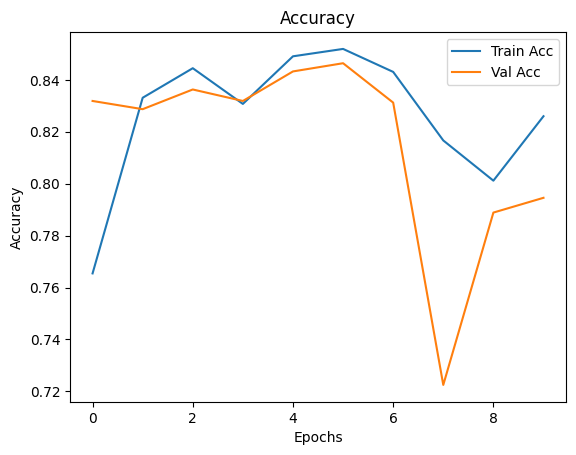

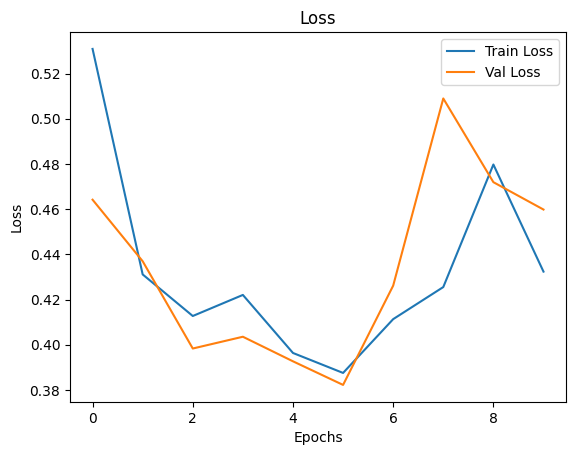

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
from PIL import Image
import numpy as np

def predict_image(path, model):
    img = Image.open(path).convert('RGB')
    img = img.resize((128, 128))
    img_array = np.array(img).astype('float32') / 255.0
    img_array = img_array.reshape(1, 128, 128, 3)
    pred = model.predict(img_array)[0][0]

    label = "Malignant" if pred > 0.5 else "Benign"
    confidence = round(pred if pred > 0.5 else 1 - pred, 2)

    print(f"🧪 Prediction: {label} ({confidence * 100:.2f}% confidence)")

In [ ]:
# Trying on one of the images used during loading
test_path = '/content/breast_cancer_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png'

predict_image(test_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
🧪 Prediction: Benign (89.00% confidence)


In [ ]:
predict_image('/content/Screenshot 2025-07-08 at 11.42.40 AM.png', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
🧪 Prediction: Malignant (69.00% confidence)


using transfer learning

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load pre-trained VGG16 without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze convolutional base

# Build your model on top of VGG16
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, Y_test)
)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 38s 146ms/step - accuracy: 0.6845 - loss: 0.6039 - val_accuracy: 0.7870 - val_loss: 0.4491
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.8069 - loss: 0.4365 - val_accuracy: 0.8161 - val_loss: 0.4124
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.8356 - loss: 0.3781 - val_accuracy: 0.8312 - val_loss: 0.3873
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.8527 - loss: 0.3575 - val_accuracy: 0.8129 - val_loss: 0.4195
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.8574 - loss: 0.3395 - val_accuracy: 0.8426 - val_loss: 0.3647
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.8688 - loss: 0.3275 - val_accuracy: 0.8470 - val_loss: 0.3673
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - accuracy: 0.8851 - loss: 0.2887 - val_accuracy: 0.8552 - val_loss: 0.3620
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.8919 - loss: 0.2829 -

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {accuracy:.4f}")

50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8398 - loss: 0.3657
Test Accuracy: 0.8502


In [ ]:
from PIL import Image
import numpy as np

def predict_image(path, model):
    img = Image.open(path).convert('RGB')
    img = img.resize((128, 128))
    img_array = np.array(img).astype('float32') / 255.0
    img_array = img_array.reshape(1, 128, 128, 3)
    pred = model.predict(img_array)[0][0]

    label = "Malignant" if pred > 0.5 else "Benign"
    confidence = round(pred if pred > 0.5 else 1 - pred, 2)

    print(f"🧪 Prediction: {label} ({confidence * 100:.2f}% confidence)")

In [ ]:
# Trying on one of the images used during loading
test_path = '/content/breast_cancer_data/BreaKHis_v1/BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png'

predict_image(test_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
🧪 Prediction: Benign (96.00% confidence)


In [ ]:
predict_image('/content/Screenshot 2025-07-08 at 11.42.40 AM.png', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
🧪 Prediction: Malignant (69.00% confidence)


In [ ]:
model.save('breast_cancer_model.h5')